# Lab | Imbalanced data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from imblearn.over_sampling import SMOTE

 ### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [3]:
data1 = data[['tenure','SeniorCitizen','MonthlyCharges', 'Churn']]
data1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [4]:
#Standardize column headers
data1.columns = [column.lower().replace(' ', '_') for column in data1.columns]
data1.head()

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


### 3. Extract the target variable.

In [5]:
Y = data1['churn']
Y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

### 4. Extract the independent variables and scale them.

In [6]:
X = data1.drop('churn', axis=1)
X.head()

,tenure,seniorcitizen,monthlycharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


### 5. Build the logistic regression model.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 6. Evaluate the model.

In [9]:
classification.score(X_test, Y_test)

0.8055358410220014

In [10]:
predictions = classification.predict(X_test)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [11]:
confusion_matrix(Y_test, predictions)

array([[956,  80],
       [194, 179]])

<AxesSubplot:>

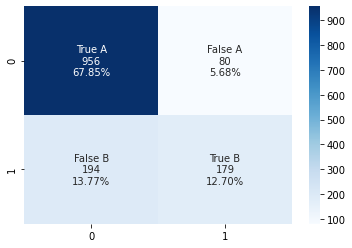

In [12]:
cf_matrix = confusion_matrix(Y_test, predictions)
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 7. Even a simple model will give us more than 70% accuracy. Why?

In [13]:
Y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [14]:
Y.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

We can see that the model gives us a 73% of accuracy >> the size of target variable is imbalanced

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [15]:
smote = SMOTE()

X_sm, Y_sm = smote.fit_resample(X, Y)
Y_sm.value_counts()

Yes    5174
No     5174
Name: churn, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

In [17]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
classification.score(X_test, Y_test)

0.748792270531401

In [19]:
predictions = classification.predict(X_test)
predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [20]:
confusion_matrix(Y_test, predictions)

array([[760, 261],
       [259, 790]])

### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [21]:
from imblearn.under_sampling import TomekLinks

tomel = TomekLinks('majority')
X_tomel, Y_tomel = tomel.fit_resample(X, Y)
Y_tomel.value_counts()

/Users/silvia/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


No     4711
Yes    1869
Name: churn, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tomel, Y_tomel, test_size=0.2, random_state=42)

In [23]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [24]:
classification.score(X_test, Y_test)

0.791033434650456

In [25]:
predictions = classification.predict(X_test)
predictions

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [26]:
confusion_matrix(Y_test, predictions)

array([[853,  99],
       [176, 188]])